<a href="https://colab.research.google.com/github/rohailkhan/abdullah/blob/master/Objective_2_july29_RGB_and_shape%3D(150%2C150%2C3)_for_Time_Invariant_Aging_Model_and_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping,TensorBoard

from keras_preprocessing.image import ImageDataGenerator 
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
import os ,PIL
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
from keras.callbacks import TensorBoard

# Data Preprocessing
## Putting all files into a single dataframe

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Put all files into a single dataframe
list_dir = [i for i in os.listdir('/content/drive/My Drive/Aging model/datafiles')]
final_df = pd.DataFrame(columns=['ID','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index','AGE'])
interim_df = pd.DataFrame(columns=['ID','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index','AGE'])
age_list=list()
for d in list_dir:
    interim_df.at[0,  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']] = pd.read_csv('/content/drive/My Drive/Aging model/datafiles/'+d, sep=" ", header=None).values[0][:7]
    interim_df['AGE'] = int(d[4:].replace('.txt','').replace('a','').replace('b',''))
    interim_df['ID'] = int(d[:3])
    final_df = pd.concat([final_df,interim_df])
    
# sort values by age of same person
final_df = final_df.sort_values(['ID','AGE'],ascending=True)

In [ ]:
#saving the dataframe
# final_df.to_csv('/content/drive/My Drive/Aging model/new/final_df.csv',index=False)

In [4]:
final_df=pd.read_csv('/content/drive/My Drive/Aging model/new/final_df.csv')

In [6]:
final_df.head()

,ID,Facial Index,Mandibular Index,Intercantal Index,Orbital Width Index,Eye Fissure Index,Vermilion Height Index,Mouth Face Width Index,AGE
0,1,0.806070,0.336661,0.390837,0.828399,0.521382,0.599030,0.346350,2
1,1,0.852819,0.442643,0.386980,0.774311,0.461004,0.659254,0.393676,5
2,1,0.877282,0.404491,0.442716,0.675757,0.358158,0.306820,0.384508,8
3,1,0.883831,0.395061,0.415456,0.698110,0.419721,0.409635,0.361281,10
4,1,0.892233,0.408905,0.421452,0.690838,0.414924,0.511849,0.428505,14


# Removing un necessary columns


In [ ]:
# removing the un necessary features
final_df.drop(final_df.columns[[1,2,3,4,5,6,7]], axis = 1, inplace = True) 

In [ ]:
final_df.head(3)

,ID,AGE
0,1,2
1,1,5
2,1,8


In [ ]:
final_df.tail(3)

,ID,AGE
999,82,25
1000,82,27
1001,82,31


## Class distribution

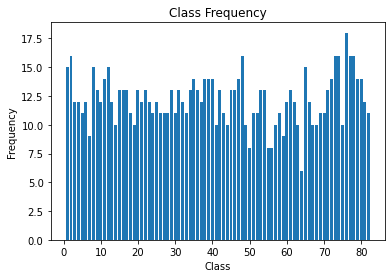

In [ ]:
classes=final_df[['ID']].values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

## One hot encoding of the target labels

In [ ]:
# use pd.concat to join the new columns with your original dataframe
df = pd.concat([final_df['ID'],pd.get_dummies(final_df['ID'], prefix='person')],axis=1)

In [ ]:
#saving the dataframe
df.to_csv('/content/sample_data/df.csv',index=False)

In [ ]:
df=pd.read_csv('/content/sample_data/df.csv')

In [ ]:
df.head()

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10,person_11,person_12,person_13,person_14,person_15,person_16,person_17,person_18,person_19,person_20,person_21,person_22,person_23,person_24,person_25,person_26,person_27,person_28,person_29,person_30,person_31,person_32,person_33,person_34,person_35,person_36,person_37,person_38,person_39,...,person_44,person_45,person_46,person_47,person_48,person_49,person_50,person_51,person_52,person_53,person_54,person_55,person_56,person_57,person_58,person_59,person_60,person_61,person_62,person_63,person_64,person_65,person_66,person_67,person_68,person_69,person_70,person_71,person_72,person_73,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A02.JPG
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A05.JPG
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A08.JPG
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A10.JPG
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A14.JPG


In [ ]:
df.tail()

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10,person_11,person_12,person_13,person_14,person_15,person_16,person_17,person_18,person_19,person_20,person_21,person_22,person_23,person_24,person_25,person_26,person_27,person_28,person_29,person_30,person_31,person_32,person_33,person_34,person_35,person_36,person_37,person_38,person_39,...,person_43,person_44,person_45,person_46,person_47,person_48,person_49,person_50,person_51,person_52,person_53,person_54,person_55,person_56,person_57,person_58,person_59,person_60,person_61,person_62,person_63,person_64,person_65,person_66,person_67,person_68,person_69,person_70,person_71,person_72,person_73,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82
997,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
998,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
999,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1000,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1001,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.columns

Index(['ID', 'person_1', 'person_2', 'person_3', 'person_4', 'person_5',
       'person_6', 'person_7', 'person_8', 'person_9', 'person_10',
       'person_11', 'person_12', 'person_13', 'person_14', 'person_15',
       'person_16', 'person_17', 'person_18', 'person_19', 'person_20',
       'person_21', 'person_22', 'person_23', 'person_24', 'person_25',
       'person_26', 'person_27', 'person_28', 'person_29', 'person_30',
       'person_31', 'person_32', 'person_33', 'person_34', 'person_35',
       'person_36', 'person_37', 'person_38', 'person_39', 'person_40',
       'person_41', 'person_42', 'person_43', 'person_44', 'person_45',
       'person_46', 'person_47', 'person_48', 'person_49', 'person_50',
       'person_51', 'person_52', 'person_53', 'person_54', 'person_55',
       'person_56', 'person_57', 'person_58', 'person_59', 'person_60',
       'person_61', 'person_62', 'person_63', 'person_64', 'person_65',
       'person_66', 'person_67', 'person_68', 'person_69', 'person_

## Adding original image names to the dataframe
### Note : "fg" folder contains the 1002 images in .JPG format

In [ ]:
# addng file names to the dataframe as a new columns called 'fiale_name"
image_names=[]
for i in os.listdir('/content/drive/My Drive/Aging model/fg'):
  image_names.append(i)

In [ ]:
len(image_names)

1002

In [ ]:
df['file_name']=image_names

In [ ]:
df.head()

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10,person_11,person_12,person_13,person_14,person_15,person_16,person_17,person_18,person_19,person_20,person_21,person_22,person_23,person_24,person_25,person_26,person_27,person_28,person_29,person_30,person_31,person_32,person_33,person_34,person_35,person_36,person_37,person_38,person_39,...,person_44,person_45,person_46,person_47,person_48,person_49,person_50,person_51,person_52,person_53,person_54,person_55,person_56,person_57,person_58,person_59,person_60,person_61,person_62,person_63,person_64,person_65,person_66,person_67,person_68,person_69,person_70,person_71,person_72,person_73,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,006A36.JPG
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,005A30.JPG
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A02.JPG
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A10.JPG
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A16.JPG


In [ ]:
df=df.sort_values('file_name')

In [ ]:
df.tail(20)

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10,person_11,person_12,person_13,person_14,person_15,person_16,person_17,person_18,person_19,person_20,person_21,person_22,person_23,person_24,person_25,person_26,person_27,person_28,person_29,person_30,person_31,person_32,person_33,person_34,person_35,person_36,person_37,person_38,person_39,...,person_44,person_45,person_46,person_47,person_48,person_49,person_50,person_51,person_52,person_53,person_54,person_55,person_56,person_57,person_58,person_59,person_60,person_61,person_62,person_63,person_64,person_65,person_66,person_67,person_68,person_69,person_70,person_71,person_72,person_73,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
980,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,081A03.JPG
979,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,081A04.JPG
969,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,081A05.JPG
971,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,081A06.JPG
982,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,081A07.JPG
983,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,081A08.JPG
984,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,081A10.JPG
986,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,081A11.JPG
985,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,081A12.JPG
988,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,082A00.JPG


In [ ]:
# saving the above dataframe as csv
df.to_csv('/content/drive/My Drive/Aging model/new/df.csv',index=False)

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Aging model/new/df.csv')

# Splitting data in training and validation sets

In [ ]:
 train_size = len(df['ID'].unique()) * .8
train = pd.DataFrame()
valid = pd.DataFrame()
for n,i in enumerate(df['ID'].unique()):
    if n< train_size:
        train = pd.concat([train, df[df['ID']==i]])
    else:
        valid = pd.concat([valid, df[df['ID']==i]])
 

In [ ]:
print('Training Set Has: ' + str(len(train.groupby('ID').count())) + ' people')
print('Validation  Set Has: ' + str(len(valid.groupby('ID').count())) + ' people')

Training Set Has: 66 people
Validation  Set Has: 16 people


In [ ]:
train.head()

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10,person_11,person_12,person_13,person_14,person_15,person_16,person_17,person_18,person_19,person_20,person_21,person_22,person_23,person_24,person_25,person_26,person_27,person_28,person_29,person_30,person_31,person_32,person_33,person_34,person_35,person_36,person_37,person_38,person_39,...,person_44,person_45,person_46,person_47,person_48,person_49,person_50,person_51,person_52,person_53,person_54,person_55,person_56,person_57,person_58,person_59,person_60,person_61,person_62,person_63,person_64,person_65,person_66,person_67,person_68,person_69,person_70,person_71,person_72,person_73,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A02.JPG
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A05.JPG
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A08.JPG
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A10.JPG
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A14.JPG


In [ ]:
valid.tail()

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10,person_11,person_12,person_13,person_14,person_15,person_16,person_17,person_18,person_19,person_20,person_21,person_22,person_23,person_24,person_25,person_26,person_27,person_28,person_29,person_30,person_31,person_32,person_33,person_34,person_35,person_36,person_37,person_38,person_39,...,person_44,person_45,person_46,person_47,person_48,person_49,person_50,person_51,person_52,person_53,person_54,person_55,person_56,person_57,person_58,person_59,person_60,person_61,person_62,person_63,person_64,person_65,person_66,person_67,person_68,person_69,person_70,person_71,person_72,person_73,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
997,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,082A22.JPG
998,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,082A23.JPG
999,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,082A25.JPG
1000,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,082A27.JPG
1001,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,082A31.JPG


# Preparing Test data

In [ ]:
# The unique ID of persons in train dataframe
np.unique(train.ID.values)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])

In [ ]:
# taking data of 8 person out from the training dataframe to use in test data
test_ids= [ 34,35, 36, 37, 38, 39, 40, 41] 

In [ ]:
# selecting rows based on condition 
test= train[train['ID'].isin(test_ids)] 
test.head(3)

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10,person_11,person_12,person_13,person_14,person_15,person_16,person_17,person_18,person_19,person_20,person_21,person_22,person_23,person_24,person_25,person_26,person_27,person_28,person_29,person_30,person_31,person_32,person_33,person_34,person_35,person_36,person_37,person_38,person_39,...,person_44,person_45,person_46,person_47,person_48,person_49,person_50,person_51,person_52,person_53,person_54,person_55,person_56,person_57,person_58,person_59,person_60,person_61,person_62,person_63,person_64,person_65,person_66,person_67,person_68,person_69,person_70,person_71,person_72,person_73,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
404,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,034A02.JPG
405,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,034A04.JPG
406,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,034A11.JPG


In [ ]:
print(train.shape, valid.shape,test.shape )

(790, 84) (212, 84) (104, 84)


In [ ]:
# removing the Test IDs from the Traind data
# removing 34,35, 36, 37, 38, 39, 40, 41 indices
train_ids=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '42', '43', '44', '45', '46', '47',
       '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71',
       '72', '73', '74', '75', '76', '77', '78', '79', '80', '81']

In [ ]:
train= train[train['ID'].isin(train_ids)] 
train.head()

,ID,person_1,person_2,person_3,person_4,person_5,person_6,person_7,person_8,person_9,person_10,person_11,person_12,person_13,person_14,person_15,person_16,person_17,person_18,person_19,person_20,person_21,person_22,person_23,person_24,person_25,person_26,person_27,person_28,person_29,person_30,person_31,person_32,person_33,person_34,person_35,person_36,person_37,person_38,person_39,...,person_44,person_45,person_46,person_47,person_48,person_49,person_50,person_51,person_52,person_53,person_54,person_55,person_56,person_57,person_58,person_59,person_60,person_61,person_62,person_63,person_64,person_65,person_66,person_67,person_68,person_69,person_70,person_71,person_72,person_73,person_74,person_75,person_76,person_77,person_78,person_79,person_80,person_81,person_82,file_name
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A02.JPG
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A05.JPG
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A08.JPG
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A10.JPG
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001A14.JPG


In [ ]:
print(train.shape, valid.shape,test.shape )

(686, 84) (212, 84) (104, 84)


In [ ]:
train1=train
valid1=valid
test1=test

In [ ]:
print('Training    Set Has: ' + str(len(train.groupby('ID').count())) + ' people')
print('Validation  Set Has: ' + str(len(valid.groupby('ID').count())) + ' people')
print('.....Test   Set Has:  ' + str(len(test.groupby('ID').count())) + ' people')

Training    Set Has: 58 people
Validation  Set Has: 16 people
.....Test   Set Has:  8 people


In [ ]:
train.to_csv('/content/drive/My Drive/Aging model/new/train.csv',index=False)
valid.to_csv('/content/drive/My Drive/Aging model/new/valid.csv',index=False)
test.to_csv('/content/drive/My Drive/Aging model/new/test.csv',index=False)

In [7]:
train=pd.read_csv('/content/drive/My Drive/Aging model/new/train.csv')
valid=pd.read_csv('/content/drive/My Drive/Aging model/new/valid.csv')
test=pd.read_csv('/content/drive/My Drive/Aging model/new/test.csv')

In [8]:
print(train.shape,valid.shape,test.shape)

(686, 84) (212, 84) (104, 84)


# Taking out two photos for prediction

In [9]:
train1=train

In [ ]:
train.head(30)

In [ ]:
train.tail(30)

## Dropping image 002A36.JPG (with index=29) and
## dropping image 065A09.JPG (with index=671) from the train set

In [6]:
train.shape

(686, 84)

In [7]:
train2=train

In [8]:
train2.drop([29, 671],inplace=True)

In [23]:
train2.shape

(684, 84)

In [25]:
train2.to_csv('/content/drive/My Drive/Aging model/new/train2.csv',index=False)

In [9]:
train2=pd.read_csv('/content/drive/My Drive/Aging model/new/train2.csv')

In [10]:
print('Training    Set Has: ' + str(len(train2.groupby('ID').count())) + ' people')
print('Validation  Set Has: ' + str(len(valid.groupby('ID').count())) + ' people')
print('.....Test   Set Has:  ' + str(len(test.groupby('ID').count())) + ' people')

Training    Set Has: 58 people
Validation  Set Has: 16 people
.....Test   Set Has:  8 people


## Target Labels

In [ ]:
train2.columns

Index(['ID', 'person_1', 'person_2', 'person_3', 'person_4', 'person_5',
       'person_6', 'person_7', 'person_8', 'person_9', 'person_10',
       'person_11', 'person_12', 'person_13', 'person_14', 'person_15',
       'person_16', 'person_17', 'person_18', 'person_19', 'person_20',
       'person_21', 'person_22', 'person_23', 'person_24', 'person_25',
       'person_26', 'person_27', 'person_28', 'person_29', 'person_30',
       'person_31', 'person_32', 'person_33', 'person_34', 'person_35',
       'person_36', 'person_37', 'person_38', 'person_39', 'person_40',
       'person_41', 'person_42', 'person_43', 'person_44', 'person_45',
       'person_46', 'person_47', 'person_48', 'person_49', 'person_50',
       'person_51', 'person_52', 'person_53', 'person_54', 'person_55',
       'person_56', 'person_57', 'person_58', 'person_59', 'person_60',
       'person_61', 'person_62', 'person_63', 'person_64', 'person_65',
       'person_66', 'person_67', 'person_68', 'person_69', 'person_

In [11]:
target_columns=['person_1', 'person_2', 'person_3', 'person_4', 'person_5',
       'person_6', 'person_7', 'person_8', 'person_9', 'person_10',
       'person_11', 'person_12', 'person_13', 'person_14', 'person_15',
       'person_16', 'person_17', 'person_18', 'person_19', 'person_20',
       'person_21', 'person_22', 'person_23', 'person_24', 'person_25',
       'person_26', 'person_27', 'person_28', 'person_29', 'person_30',
       'person_31', 'person_32', 'person_33', 'person_34', 'person_35',
       'person_36', 'person_37', 'person_38', 'person_39', 'person_40',
       'person_41', 'person_42', 'person_43', 'person_44', 'person_45',
       'person_46', 'person_47', 'person_48', 'person_49', 'person_50',
       'person_51', 'person_52', 'person_53', 'person_54', 'person_55',
       'person_56', 'person_57', 'person_58', 'person_59', 'person_60',
       'person_61', 'person_62', 'person_63', 'person_64', 'person_65',
       'person_66', 'person_67', 'person_68', 'person_69', 'person_70',
       'person_71', 'person_72', 'person_73', 'person_74', 'person_75',
       'person_76', 'person_77', 'person_78', 'person_79', 'person_80',
       'person_81', 'person_82']

# **Further Processing for developing Deep Leartning Model**

## **First doing Face Augmentation only for the Train Data**

In [38]:
## Defining Augmentation object using ImageDataGenerator
TRAIN_DATAGEN = ImageDataGenerator(
rescale=1./255,
rotation_range=-40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

## Train generator

In [39]:
train_generator=TRAIN_DATAGEN.flow_from_dataframe(
dataframe=train,
directory="/content/drive/My Drive/Aging model/fg",
x_col='file_name',
y_col=target_columns,
batch_size=32,
seed=42,
#new
color_mode="rgb",
shuffle=True,class_mode='raw',
target_size=(200,200))

Found 686 validated image filenames.


## Validation generator

In [41]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator=valid_datagen.flow_from_dataframe(
dataframe=valid,
directory="/content/drive/My Drive/Aging model/fg",
x_col='file_name',
y_col=target_columns,
batch_size=32,
seed=42,
#new
color_mode="rgb",
shuffle=True,class_mode='raw',
target_size=(200,200))

Found 212 validated image filenames.


##  Test generator

class_mode: one of "binary", "categorical", "input", "multi_output",  
        "raw", sparse" or None. Default: "categorical".

In [42]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory="/content/drive/My Drive/Aging model/fg",
x_col='file_name',
y_col=target_columns,
batch_size=32,
seed=42,
#new
color_mode="rgb",
shuffle=True,class_mode='raw',
target_size=(200,200))

Found 104 validated image filenames.


# **Buidling Convlutional Network Model**

In [43]:
# adding regularization
from keras.regularizers import l2
from keras.layers.advanced_activations import LeakyReLU
act = LeakyReLU(alpha=0.1)

In [44]:
## Alhamdulillah...

model6 =Sequential()

model6.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3)))
model6.add(act)
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))


model6.add(Conv2D(64, (3, 3)))
model6.add(act)
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))


#model6.add(Conv2D(128, (3,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model6.add(Conv2D(128, (3, 3)))
model6.add(act)
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))


#model6.add(Conv2D(128, (3,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model6.add(Conv2D(128, (3, 3)))
model6.add(act)
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))


model6.add(Conv2D(256, (3, 3)))
model6.add(act)
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))

model6.add(Flatten())
model6.add(Dropout(0.2))
model6.add(Dense(512))
model6.add(act)
model6.add(Dense(82, activation='sigmoid'))


## Summary of Model 6

In [ ]:
model6.summary()

## Compiling Model

In [45]:
model6.compile(loss='binary_crossentropy',
optimizer=optimizers.Adam(learning_rate=1e-5),
metrics=['accuracy'])

## Introducint Tensor Board

In [ ]:
log_directory='/content/drive/My Drive/Aging model/new2/log//fit'
board=TensorBoard(log_dir=log_directory,histogram_freq=1,write_graph=True,write_images=True,update_freq='epoch',
                  profile_batch=2)

# **Training Begins**

In [46]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

history=model6.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10 
                    #10-12 is better
)

Epoch 1/10
21/21 [==============================] - 9s 428ms/step - loss: 0.6541 - accuracy: 0.6459 - val_loss: 0.6682 - val_accuracy: 0.8053
Epoch 2/10
21/21 [==============================] - 9s 425ms/step - loss: 0.5581 - accuracy: 0.8402 - val_loss: 0.6284 - val_accuracy: 0.9110
Epoch 3/10
21/21 [==============================] - 8s 392ms/step - loss: 0.4128 - accuracy: 0.9316 - val_loss: 0.5449 - val_accuracy: 0.9726
Epoch 4/10
21/21 [==============================] - 8s 398ms/step - loss: 0.2405 - accuracy: 0.9777 - val_loss: 0.4274 - val_accuracy: 0.9878
Epoch 5/10
21/21 [==============================] - 8s 378ms/step - loss: 0.1233 - accuracy: 0.9875 - val_loss: 0.3050 - val_accuracy: 0.9878
Epoch 6/10
21/21 [==============================] - 8s 404ms/step - loss: 0.0860 - accuracy: 0.9878 - val_loss: 0.2400 - val_accuracy: 0.9878
Epoch 7/10
21/21 [==============================] - 8s 393ms/step - loss: 0.0777 - accuracy: 0.9878 - val_loss: 0.2209 - val_accuracy: 0.9878
Epoch 

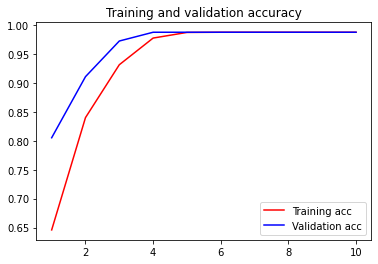

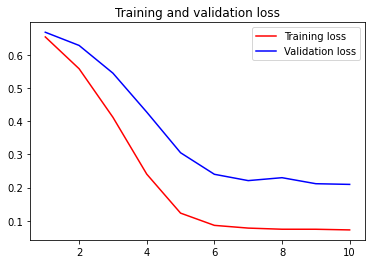

In [47]:

### FINAL Alhamdulillah...use sigmoid with binary-entropy...
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## **Model Evaluation on un seen data**

In [49]:
score=model6.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22043541073799133
Test accuracy: 0.9878048300743103


# Predictions

In [50]:
# test_ids= [ 34,35, 36, 37, 38, 39, 40, 41] 
# 34,35, 36, 37, 38, 39, 40, 41

test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
test_generator.reset()
predictions = model6.predict_generator(test_generator, steps=test_steps_per_epoch,verbose=0)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)



In [51]:
predicted_classes 

array([12, 19,  7, 47,  7, 12, 44, 47, 32, 19, 19, 12, 64, 19, 12, 19, 19,
       47, 44, 44, 19, 12, 44, 47, 64,  7, 12, 19, 19, 19,  7, 44, 12, 19,
       19, 44, 19, 47, 19, 32, 19,  7, 19, 19, 47, 64, 19, 12, 47, 47, 32,
       44, 19, 19, 12, 44, 44, 47, 47, 12, 19, 19, 12, 19, 19, 19, 19, 32,
       19, 19, 19, 32, 32, 19, 19, 19, 19, 19, 19, 19, 47, 19, 12, 12, 19,
       47, 19, 12, 47, 12, 12, 12, 19, 19, 44,  7, 19, 47,  7, 12, 12, 44,
       12, 12])

In [108]:
c=[ 12, 19,  7, 47,  7, 12, 44, 47, 32, 19, 19, 12, 64, 19, 12, 19, 19,
       47, 44, 44, 19, 12, 44, 47, 64,  7, 12, 19, 19, 19,  7, 44, 12, 19,
       19, 44, 19, 47, 19, 32, 19,  7, 19, 19, 47, 64, 19, 12, 47, 47, 32,
       44, 19, 19, 12, 44, 44, 47, 47, 12, 19, 19, 12, 19, 19, 19, 19, 32,
       19, 19, 19, 32, 32, 19, 19, 19, 19, 19, 19, 19, 47, 19, 12, 12, 19,
       47, 19, 12, 47, 12, 12, 12, 19, 19, 44,  7, 19, 47,  7, 12, 12, 44,
       12, 12]
nine=[]
fiftysix=[]
seventy=[]
sixtyeight=[]
for i in range(0,len(c)):
  if c[i]==56:
    fiftysix.append(c[i])
  if c[i]==9:
    nine.append([c[i]])
  if c[i]==70:
    seventy.append(c[i])
  if c[i]==68:
    sixtyeight.append([c[i]])
print(len(nine))
print(len(seventy))
print(len(fiftysix))
print(len(sixtyeight))

56
7
28
8


# Prediction for single image

In [53]:
from keras_preprocessing import image

In [57]:
test_image = image.load_img('/content/drive/My Drive/Aging model/fg/019A23.JPG', target_size=(200, 200))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis=0)
test_generator.reset()

prediction = model6.predict(test_image)

np.argmax(prediction, axis=1)


array([19])

# Yes 0019A23 is good

In [ ]:
test_image = image.load_img('/content/drive/My Drive/Aging model/fg/012A27.JPG', target_size=(200, 200))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis=0)
test_generator.reset()

prediction = model6.predict(test_image)

np.argmax(prediction, axis=1)


# Yes 012A27 is good

In [66]:
test_image = image.load_img('/content/drive/My Drive/Aging model/fg/012A30.JPG', target_size=(200, 200))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis=0)
test_generator.reset()

prediction = model6.predict(test_image)

np.argmax(prediction, axis=1)


array([12])

# Yes 012A30 is good

In [87]:
test_image = image.load_img('/content/drive/My Drive/Aging model/fg/039A17.JPG', target_size=(200,200))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis=0)
test_generator.reset()

prediction = model6.predict(test_image)
np.argmax(prediction, axis=1)


array([44])

In [ ]:
047A23

# Precision and Recall

In [ ]:
'''model6.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss="binary_crossentropy",
              metrics=[metrics.Precision(), metrics.Recall()])'''

# Multi Label Classification with a Multi Output Model

In [ ]:
# Multi Label Classification with a Multi Output Model



from keras import Input ,Model

output_list=['output1','output2','output3','output4','output5','output6','output7',
'output8','output9','output10','output11','output12','output13','output14','output15','output16','output17','output18','output19','output20','output21','output22','output23','output24','output25','output26','output27','output28','output29','output30','output31','output32','output33','output34','output35','output36','output37','output38','output39','output40','output41','output42','output43','output44','output45','output46','output47','output48','output49','output50','output51','output52','output53','output54','output55','output56','output57','output58','output59','output60','output61','output62','output63','output64',
'output65','output66','output67','output68','output69','output70','output71','output72','output73','output74','output75','output76','output77','output78','output79','output80','output81',
'output82',]

model.compile(optimizers.rmsprop(lr = 0.0001, decay = 1e-6),
loss = ["binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy","binary_crossentropy", "binary_crossentropy","binary_crossentropy", "binary_crossentropy",		"binary_crossentropy","binary_crossentropy"],metrics = ["accuracy"])

In [92]:
inp = Input(shape = (150,150,1))
x = Conv2D(32, (3, 3), padding = 'same')(inp)
x = Activation('relu')(x)
x = Conv2D(32, (3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), padding = 'same')(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(512)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
output1 = Dense(1, activation = 'sigmoid')(x)
output2 = Dense(1, activation = 'sigmoid')(x)
output3 = Dense(1, activation = 'sigmoid')(x)
output4 = Dense(1, activation = 'sigmoid')(x)
output5 = Dense(1, activation = 'sigmoid')(x)
output6 = Dense(1, activation = 'sigmoid')(x)
output7 = Dense(1, activation = 'sigmoid')(x)
output8 = Dense(1, activation = 'sigmoid')(x)
output9 = Dense(1, activation = 'sigmoid')(x)
output10 = Dense(1, activation = 'sigmoid')(x)

output11 = Dense(1, activation = 'sigmoid')(x)
output12 = Dense(1, activation = 'sigmoid')(x)
output13 = Dense(1, activation = 'sigmoid')(x)
output14 = Dense(1, activation = 'sigmoid')(x)
output15 = Dense(1, activation = 'sigmoid')(x)
output16 = Dense(1, activation = 'sigmoid')(x)
output17 = Dense(1, activation = 'sigmoid')(x)
output18 = Dense(1, activation = 'sigmoid')(x)
output19 = Dense(1, activation = 'sigmoid')(x)
output20 = Dense(1, activation = 'sigmoid')(x)

output21 = Dense(1, activation = 'sigmoid')(x)
output22 = Dense(1, activation = 'sigmoid')(x)
output23 = Dense(1, activation = 'sigmoid')(x)
output24 = Dense(1, activation = 'sigmoid')(x)
output25 = Dense(1, activation = 'sigmoid')(x)
output26 = Dense(1, activation = 'sigmoid')(x)
output27 = Dense(1, activation = 'sigmoid')(x)
output28 = Dense(1, activation = 'sigmoid')(x)
output29 = Dense(1, activation = 'sigmoid')(x)
output30 = Dense(1, activation = 'sigmoid')(x)

output31 = Dense(1, activation = 'sigmoid')(x)
output32 = Dense(1, activation = 'sigmoid')(x)
output33 = Dense(1, activation = 'sigmoid')(x)
output34 = Dense(1, activation = 'sigmoid')(x)
output35 = Dense(1, activation = 'sigmoid')(x)
output36 = Dense(1, activation = 'sigmoid')(x)
output37 = Dense(1, activation = 'sigmoid')(x)
output38 = Dense(1, activation = 'sigmoid')(x)
output39 = Dense(1, activation = 'sigmoid')(x)
output40 = Dense(1, activation = 'sigmoid')(x)

output41 = Dense(1, activation = 'sigmoid')(x)
output42 = Dense(1, activation = 'sigmoid')(x)
output43 = Dense(1, activation = 'sigmoid')(x)
output44 = Dense(1, activation = 'sigmoid')(x)
output45 = Dense(1, activation = 'sigmoid')(x)
output46 = Dense(1, activation = 'sigmoid')(x)
output47 = Dense(1, activation = 'sigmoid')(x)
output48 = Dense(1, activation = 'sigmoid')(x)
output49 = Dense(1, activation = 'sigmoid')(x)
output50 = Dense(1, activation = 'sigmoid')(x)

output51 = Dense(1, activation = 'sigmoid')(x)
output52 = Dense(1, activation = 'sigmoid')(x)
output53 = Dense(1, activation = 'sigmoid')(x)
output54 = Dense(1, activation = 'sigmoid')(x)
output55 = Dense(1, activation = 'sigmoid')(x)
output56 = Dense(1, activation = 'sigmoid')(x)
output57 = Dense(1, activation = 'sigmoid')(x)
output58 = Dense(1, activation = 'sigmoid')(x)
output59 = Dense(1, activation = 'sigmoid')(x)
output60 = Dense(1, activation = 'sigmoid')(x)

output61 = Dense(1, activation = 'sigmoid')(x)
output62 = Dense(1, activation = 'sigmoid')(x)
output63 = Dense(1, activation = 'sigmoid')(x)
output64 = Dense(1, activation = 'sigmoid')(x)
output65 = Dense(1, activation = 'sigmoid')(x)
output66 = Dense(1, activation = 'sigmoid')(x)
output67 = Dense(1, activation = 'sigmoid')(x)
output68 = Dense(1, activation = 'sigmoid')(x)
output69 = Dense(1, activation = 'sigmoid')(x)
output70 = Dense(1, activation = 'sigmoid')(x)

output71 = Dense(1, activation = 'sigmoid')(x)
output72 = Dense(1, activation = 'sigmoid')(x)
output73 = Dense(1, activation = 'sigmoid')(x)
output74 = Dense(1, activation = 'sigmoid')(x)
output75 = Dense(1, activation = 'sigmoid')(x)
output76 = Dense(1, activation = 'sigmoid')(x)
output77 = Dense(1, activation = 'sigmoid')(x)
output78 = Dense(1, activation = 'sigmoid')(x)
output79 = Dense(1, activation = 'sigmoid')(x)
output80 = Dense(1, activation = 'sigmoid')(x)

output81 = Dense(1, activation = 'sigmoid')(x)
output82 = Dense(1, activation = 'sigmoid')(x)
